In [4]:
library(dplyr)
library(Quandl)
library(ggplot2)
library(zoo)
library(reshape2)
library(chron)
library(dualplot)
library(timeSeries)

In [2]:
Quandl.api_key(api_key = "8u9meDr5sQxGim8ATVt6")

In [3]:
tickers = list(c('WTI','CHRIS/CME_CL1.4'),
               c('Gold','CHRIS/CME_GC1.4'),
               c('Natural_Gas','CHRIS/CME_NG1.4'),
               c('Silver','CHRIS/CME_SI1.4'),
               c('Corn','CHRIS/CME_C1.4'),
               c('Wheat','CHRIS/CME_W1.4'),
               c('S&P_500','CHRIS/CME_ES1.6'),
               c('Dollar_TWI','FRED/DTWEXM'),
               c('US_Corps','ML/TRI'),
               c('US_AA','ML/AATRI'),
               c('US_BBB','ML/BBTRI'),
               c('EM_Corps','ML/EMCTRI'), 
               c('Fed_Funds_Rate','FRED/DFF'))

Real_GDP = 'FRED/GDPMC1'

### Asset Prices

In [5]:
get_data = function(product, start, end, collapse) {
    
    #List of Quandl codes
    q = list()  
    for(i in c(1:length(product))){q[i] = product[[i]][2]}
    
    #List of column names
    w = list()
    for(i in c(1:length(product))){w[i] = product[[i]][1]}
    
    #Generate code
    df = Quandl(code = q, 
                start_date = start, 
                end_date = end, 
                collapse = collapse)
    
    #Make the Date column as index
    rownames(df) = df$Date
    df$Date = NULL
    
    #Column Names are looped over the list of product names
    colnames(df) = w
    
    #Remove Weekends from Data
    df_final = df[which(weekdays(as.Date(rownames(df)))
          %in% c('Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday')), ]
    
    return(round(df_final, digits=1))
}

In [6]:
#Generate DF with all asset prices
portfolio = get_data(product=tickers, 
                     start='01-01-1940', 
                     end='01-01-2018', 
                     collapse='daily')
tail(portfolio, 14)

,WTI,Gold,Natural_Gas,Silver,Corn,Wheat,S&P_500,Dollar_TWI,US_Corps,US_AA,US_BBB,EM_Corps,Fed_Funds_Rate
2017-07-11,45.8,1217.0,3.0,15.8,392.0,533.2,2424.5,90.7,2835.2,642.1,431.4,384.9,1.2
2017-07-12,45.5,1219.7,3.0,15.9,376.2,521.5,2440.0,90.3,2842.7,643.8,432.4,385.8,1.2
2017-07-13,46.1,1216.7,3.0,15.6,360.0,496.0,2445.5,90.3,2839.8,643.0,432.6,386.0,1.2
2017-07-14,46.7,1228.0,3.0,15.9,369.0,NA,2456.0,89.7,2844.4,644.0,433.3,386.2,1.2
2017-07-17,46.0,1233.2,3.0,16.1,375.0,506.0,2458.5,89.7,2848.7,644.9,434.1,386.6,1.2
2017-07-18,46.2,1241.9,3.1,16.2,377.0,504.5,2457.8,89.2,2857.3,646.7,434.5,387.0,1.2
2017-07-19,47.1,1240.9,3.1,16.2,382.0,504.2,2471.5,89.2,2858.4,646.9,435.1,387.4,1.2
2017-07-20,46.7,1243.9,3.0,16.2,390.5,506.8,2471.2,88.8,2860.6,647.3,435.5,387.5,1.2
2017-07-21,45.6,1255.0,3.0,16.4,379.8,499.0,2469.5,88.6,2867.0,648.6,435.4,388.0,1.2
2017-07-24,46.5,1255.3,2.9,16.5,376.5,488.5,2468.5,NA,2863.5,647.6,435.6,387.9,1.2


## Normalized Asset Prices

#### Method 1

In [23]:
normalize = function(df){
   #Transform DF ----> Matrix (for mathematical operations)
   #Remove NA values from Time Series 
    x = as.matrix(na.omit(df))
    
    #Normalize Data
    norm_prices = t(t(x)/x[1,]) * 100
    
    #Round Data
    y = round(norm_prices, digits = 2)
    
    #Return data
    return(y)
}

In [24]:
portfolio_norm = normalize(portfolio)
tail(portfolio_norm)

,WTI,Gold,Natural_Gas,Silver,Corn,Wheat,S&P_500,Dollar_TWI,US_Corps,US_AA,US_BBB,EM_Corps,Fed_Funds_Rate
2017-07-13,380.99,420.71,157.89,312,168.62,179.58,196.30,95.45,279.18,249.51,360.50,386.0,29.27
2017-07-17,380.17,426.42,157.89,322,175.64,183.20,197.34,94.82,280.05,250.25,361.75,386.6,29.27
2017-07-18,381.82,429.43,163.16,324,176.58,182.66,197.29,94.29,280.90,250.95,362.08,387.0,29.27
2017-07-19,389.26,429.08,163.16,324,178.92,182.55,198.39,94.29,281.01,251.03,362.58,387.4,29.27
2017-07-20,385.95,430.12,157.89,324,182.90,183.49,198.36,93.87,281.22,251.18,362.92,387.5,29.27
2017-07-21,376.86,433.96,157.89,328,177.89,180.67,198.23,93.66,281.85,251.69,362.83,388.0,29.27


#### Method 2

In [84]:
#Normalize Data
portfolio_norm2 = round(data.frame(lapply(na.omit(portfolio), function(X) X/X[1])) * 100, digits = 2)

#Make the index names as Dates (as in the first method)
rownames(portfolio_norm2) = as.Date(rownames(portfolio_norm))


#Show DF
tail(portfolio_norm2)

,WTI,Gold,Natural_Gas,Silver,Corn,Wheat,S.P_500,Dollar_TWI,US_Corps,US_AA,US_BBB,EM_Corps,Fed_Funds_Rate
2017-07-13,380.99,420.71,157.89,312,168.62,179.58,196.30,95.45,279.18,249.51,360.50,386.0,29.27
2017-07-17,380.17,426.42,157.89,322,175.64,183.20,197.34,94.82,280.05,250.25,361.75,386.6,29.27
2017-07-18,381.82,429.43,163.16,324,176.58,182.66,197.29,94.29,280.90,250.95,362.08,387.0,29.27
2017-07-19,389.26,429.08,163.16,324,178.92,182.55,198.39,94.29,281.01,251.03,362.58,387.4,29.27
2017-07-20,385.95,430.12,157.89,324,182.90,183.49,198.36,93.87,281.22,251.18,362.92,387.5,29.27
2017-07-21,376.86,433.96,157.89,328,177.89,180.67,198.23,93.66,281.85,251.69,362.83,388.0,29.27


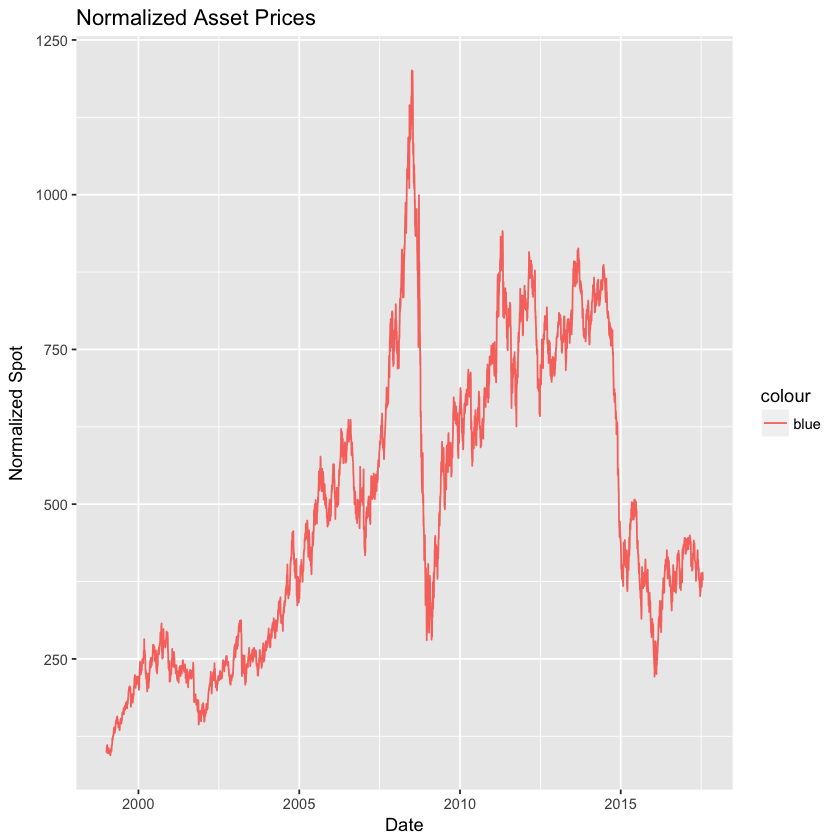

In [91]:
#Plot 1
ggplot(data = portfolio_norm2, aes(x=as.Date(rownames(portfolio_norm2)), y = portfolio_norm2$WTI)) + 
    geom_line(aes(colour='blue')) + 
    xlab('Date') + 
    ylab('Normalized Spot') + 
    labs(title='Normalized Asset Prices') 

Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”

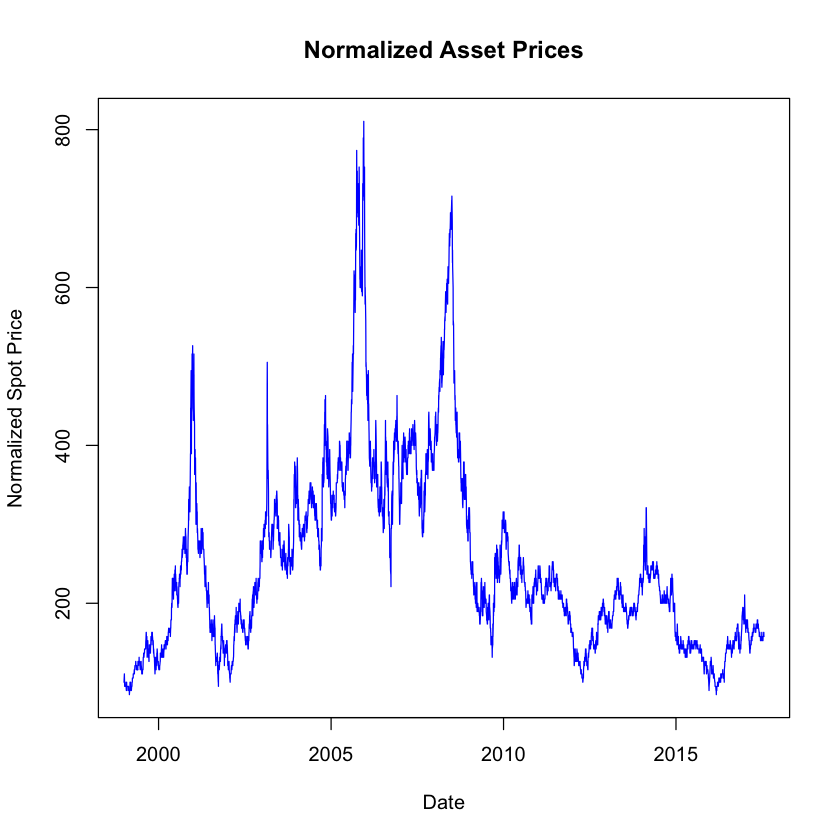

In [100]:
#Plot 2
plot(x=as.Date(rownames(portfolio_norm2)),
     y=portfolio_norm2$Natural_Gas, 
     type='line',
     col='blue', 
     main='Normalized Asset Prices', 
     xlab='Date',
     ylab='Normalized Spot Price'
    )

### Log Returns

In [7]:
#Daily Log Returns
# The lag parameter in diff() function is 1 by default
log_returns = round(diff(as.matrix(log(portfolio))), 3)

# Fill NaN values forward
log_returns = na.locf(object = log_returns, na.rm = T)

#Matrix 
class(log_returns)

#Show Matrix
tail(log_returns,10)

[1] "matrix"

,WTI,Gold,Natural_Gas,Silver,Corn,Wheat,S&P_500,Dollar_TWI,US_Corps,US_AA,US_BBB,EM_Corps,Fed_Funds_Rate
2017-07-17,-0.015,0.004,0.000,0.013,0.016,-0.050,0.001,0.000,0.002,0.001,0.002,0.001,0
2017-07-18,0.004,0.007,0.033,0.006,0.005,-0.003,0.000,-0.006,0.003,0.003,0.001,0.001,0
2017-07-19,0.019,-0.001,0.000,0.000,0.013,-0.001,0.006,0.000,0.000,0.000,0.001,0.001,0
2017-07-20,-0.009,0.002,-0.033,0.000,0.022,0.005,0.000,-0.004,0.001,0.001,0.001,0.000,0
2017-07-21,-0.024,0.009,0.000,0.012,-0.028,-0.016,-0.001,-0.002,0.002,0.002,0.000,0.001,0
2017-07-24,0.020,0.000,-0.034,0.006,-0.009,-0.021,0.000,-0.002,-0.001,-0.002,0.000,0.000,0
2017-07-25,0.042,-0.004,0.000,-0.006,-0.021,-0.014,0.002,-0.002,-0.004,-0.004,0.001,-0.001,0
2017-07-26,0.004,0.008,0.000,0.012,0.010,-0.007,0.000,-0.002,0.003,0.002,0.001,0.001,0
2017-07-27,0.008,-0.001,0.034,0.000,0.002,0.002,0.000,-0.002,-0.001,-0.001,0.000,0.001,0
2017-07-28,0.014,0.008,0.034,0.000,0.003,0.004,-0.001,-0.002,-0.001,-0.001,0.000,0.001,0


# 1.) Recession - Performance of Asset Classes

#### I.) Fed Funds Rate vs. Assets

In [8]:
get_plot = function(asset1, asset2){
    df = portfolio[,c(asset1, asset2)]
    df = na.omit(df)
    graph = dualplot(x1 = as.Date(rownames(df)),
                     y1=df$Gold, 
                     y2=df$WTI, 
                     xlab='Date', 
                     ylab1=as.character(asset1),
                     ylab2=as.character(asset2))
}

The two series will be presented visually as though they had been converted to indexes.


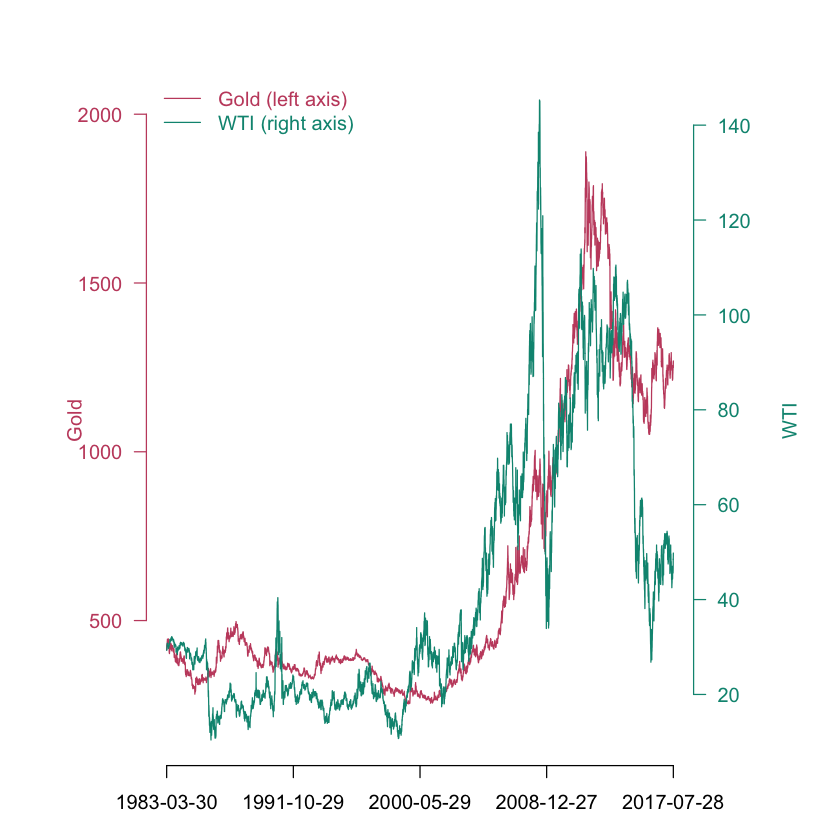

In [9]:
get_plot('Gold','WTI')